In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
# df = pd.read_csv('https://data.seattle.gov/api/views/kzjm-xkqj/rows.csv')
df = pd.read_csv('Seattle_Real_Time_Fire_911_Calls.csv')

In [ ]:
### Data exploration###

In [3]:
# columns in the data
df.columns

Index(['Address', 'Type', 'Datetime', 'Latitude', 'Longitude',
       'Report Location', 'Incident Number'],
      dtype='object')

In [4]:
# view a sample of the data
df.sample(2)

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
1538093,S Myrtle St / M L King Jr Way S,Aid Response,08/16/2021 01:41:00 PM,47.538884,-122.282179,POINT (-122.282179 47.538884),F210088642
555761,418 N 36th St,Aid Response,09/26/2010 03:21:35 PM,47.652159,-122.354092,POINT (-122.354092 47.652159),F100088901


In [5]:
# get the shape of the data
df.shape

(1721489, 7)

In [6]:
# check if there are any columns with nul values
df.isna().sum()

Address              85
Type                  0
Datetime              0
Latitude           1089
Longitude          1089
Report Location    1047
Incident Number       0
dtype: int64

In [7]:
# drop rows with null values
df.dropna(inplace=True)

In [8]:
# confirm rows with null values dropped 
df.isna().sum()

Address            0
Type               0
Datetime           0
Latitude           0
Longitude          0
Report Location    0
Incident Number    0
dtype: int64

In [9]:
# convert Datetime column to datetme datatype 
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [10]:
# Confirm data type change for Datetime column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720390 entries, 0 to 1721488
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Address          object        
 1   Type             object        
 2   Datetime         datetime64[ns]
 3   Latitude         float64       
 4   Longitude        float64       
 5   Report Location  object        
 6   Incident Number  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 105.0+ MB


In [11]:
# create Day column
df['Day'] = df.Datetime.dt.day_name()

In [12]:
# Create Month column 
df['Month'] = df.Datetime.dt.month_name()

In [13]:
# Create Year column 
df['Year'] = df.Datetime.dt.year

In [14]:
# Create Hour column 
df['Hour'] = df.Datetime.dt.hour

In [15]:
# view a sample of the data
df.sample(2)

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number,Day,Month,Year,Hour
451539,823 Madison St,Aid Response,2009-06-10 11:44:53,47.608054,-122.32821,POINT (-122.32821 47.608054),F090053429,Wednesday,June,2009,11
1121661,3651 34th Av S,Rescue Elevator,2016-12-21 13:19:00,47.571115,-122.28993,POINT (-122.28993 47.571115),F160140233,Wednesday,December,2016,13


### Visualizations

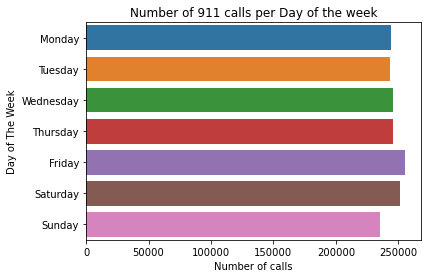

In [16]:
# plot number of calls per day of the week
days_order = (['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.countplot(y=df.Day, order=days_order)
plt.ylabel('Day of The Week')
plt.xlabel('Number of calls')
plt.title('Number of 911 calls per Day of the week');

Text(0.5, 1.0, 'Number of 911 calls per Month')

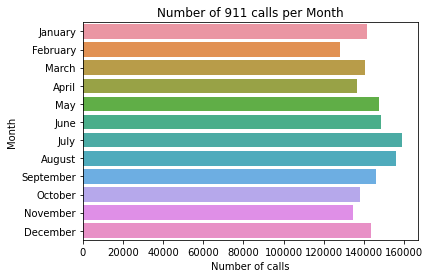

In [17]:
# plot number of calls per Month
month_order = (['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.countplot(y=df.Month, order=month_order)
plt.ylabel('Month')
plt.xlabel('Number of calls')
plt.title('Number of 911 calls per Month')

Text(0.5, 1.0, 'Number of 911 calls per Year')

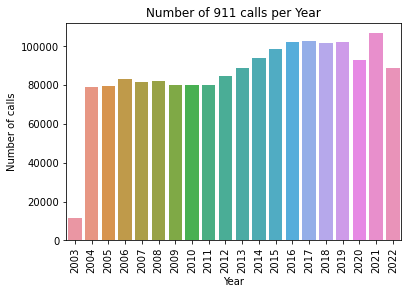

In [18]:
# plot number of calls per Year
sns.countplot(x=df.Year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of calls')
plt.title('Number of 911 calls per Year')

Text(0.5, 1.0, 'Number of 911 calls per Hour')

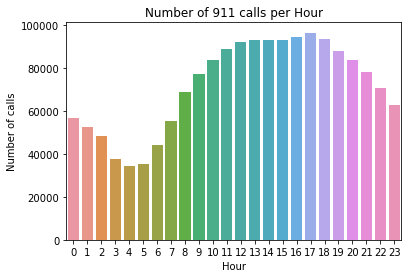

In [19]:
# plot number of calls per Hour of the day
sns.countplot(x=df.Hour)
plt.xlabel('Hour')
plt.ylabel('Number of calls')
plt.title('Number of 911 calls per Hour')

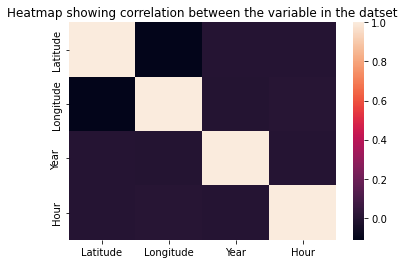

In [55]:
# plot correlation heatmap
sns.heatmap(df.corr());
plt.title('Heatmap showing correlation between the variable in the datset')
plt.show();